In [34]:
# Read the content of the input file
input_file = 'sms_trans.txt'  # Replace with your input file name
output_file = 'corpus.txt'  # Output file name

with open(input_file, 'r') as file:
    content = file.read()

# Extract sentences within <TRANS> tags
trans_sentences = []
for line in content.splitlines():
    if '<TRANS>' in line and '</TRANS>' in line:
        start = line.index('<TRANS>') + len('<TRANS>')
        end = line.index('</TRANS>')
        trans_sentence = line[start:end].strip()
        trans_sentences.append(trans_sentence)

# Join sentences and add a period at the end
result = '.'.join(trans_sentences) + '.'

# Write the result to the output file
with open(output_file, 'w') as file:
    file.write(result)

print("Extraction complete. Check the output file.")


Extraction complete. Check the output file.


In [36]:
import re

def load_text(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            if not text:  # Check if the file is empty
                print("File is empty")
            return text
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except IOError:
        print("Error: Problem reading the file")
    return None  # Return None if file could not be read

def preprocess_text(text):
    # Split text into words and symbols, keeping non-alphanumeric characters (for symbols)
    words = re.findall(r'\w+|[^\w\s]', text.lower(), re.UNICODE)
    return words

def get_unique_words(words):
    # Find and sort unique words and symbols
    return sorted(set(words))

def create_one_hot_dict(unique_words):
    # Create a one-hot encoded dictionary for unique words
    one_hot_dict = {}
    for idx, word in enumerate(unique_words):
        one_hot_vector = [0] * len(unique_words)
        one_hot_vector[idx] = 1
        one_hot_dict[word] = one_hot_vector
    return one_hot_dict

# Main flow
file_path = 'corpus.txt'  # Replace with your file path
text = load_text(file_path)
words = preprocess_text(text)
unique_words = get_unique_words(words)
one_hot_dict = create_one_hot_dict(unique_words)

# Print the dictionary for verification
for word, vector in one_hot_dict.items():
    print(f'{word}: {vector}')


.: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [37]:
len(one_hot_dict['in'])

355

Training with embedding dimension: 10
Epoch 0, Loss: 21058.019203626387
Epoch 10, Loss: 20154.115218707422
Epoch 20, Loss: 18286.43591376413
Epoch 30, Loss: 14163.192388022291
Epoch 40, Loss: 11053.04827857036
Epoch 50, Loss: 9997.277741912749
Epoch 60, Loss: 9629.240048703436
Epoch 70, Loss: 9427.652920994515
Epoch 80, Loss: 9280.799641211785
Epoch 90, Loss: 9165.704596987545


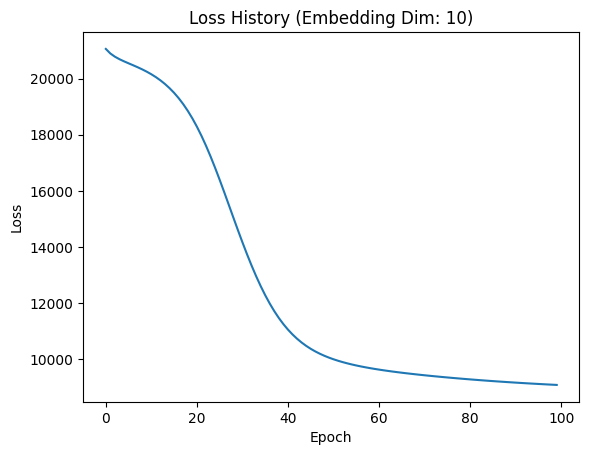

Cluster 9: ., a, about, address, after, afternoon, again, all, already, alright, am, an, and, another, any, be, because, been, being, believe, best, better, between, big, birthday, bit, bits, bored, boy, break
Cluster 4: anything, anyway, are, ask, asked, asking, asleep, at, awake, away, babe, baby, back, bad, replying, right, ring, robbed, rule, said, same, say, see, seen, send, sent, seriously, sexy, she, ship, shopping, should, since, sister, sitting, sleep, sleeping
Cluster 7: bus, business, busy, but, buy, bye, call, called, can, cant, card, case, chases, chatting, choose, christmas, cold, come, coming, confused, cool, copy, could, course, crash, crossed, dad, darling, day, did, do, doing, done, thing, things, think, thinking, this
Cluster 8: dont, down, dream, either, else, even, ever, everything, exercise, fact, feel, feeling, few, finally, fine, fingers, finish, finished, flush, follow, for, forever, forward, four, free, friend, from, front, fun
Cluster 2: game, get, getting, g

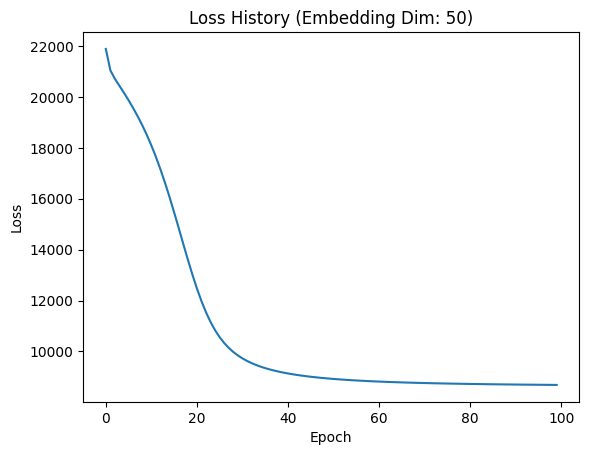

Cluster 9: ., a, about, address, after, afternoon, again, all, already, alright, am, an, and, another, choose, christmas, cold, come, coming, confused, cool, copy, could, course, crash, crossed, dad, problem, proper, put, question, really, reason, replying, right, ring, robbed, rule, said, same, say, see, seen
Cluster 4: any, anything, anyway, are, ask, asked, asking, asleep, at, awake, away, babe, baby, back, bad, be, because, been, being, believe, best, better
Cluster 6: between, big, birthday, bit, bits, bored, boy, break, bus, business, busy, but, buy, bye, call, called, can, cant, card, case, chases, chatting
Cluster 2: darling, day, did, do, doing, done, dont, down, dream, either, else, even, ever, everything, exercise, where, whether, why, wide, will, with, wondering, wont, work, working, worry, worse, would, wrist, wrote, yes, yet, you, your
Cluster 8: fact, feel, feeling, few, finally, fine, fingers, finish, finished, flush, follow, for, forever, forward, four, free, friend, f

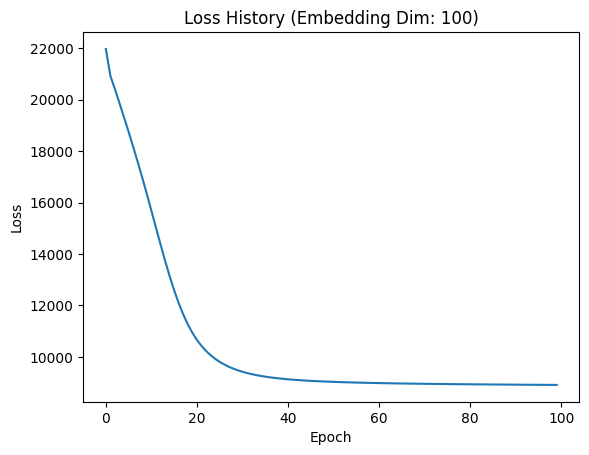

Cluster 4: ., a, about, address, after, afternoon, again, all, already, alright, am, an, and, another, any, anything, anyway, are, ask, asked, asking, at, hey, hi, him, his, holiday, life, like, lips, little, loads, long, looking, lot, lots, love, loved, loves, made, makes, man
Cluster 1: asleep, awake, away, babe, baby, back, be, nasty, need, needed, net, never, next, nice, no, not, now, number, of, off, oh, ok, okay, on, once, the, them, then, there, therefore, they, thing
Cluster 7: bad, because, holidays, washing, way, we, week, weekend, well, what, when, whenever, where, whether, why, wide, will, with, wondering, wont, work, working, worry, worse, would
Cluster 6: been, being, believe, best, better, between, big, birthday, bit, bits, bored, boy, break, bus, business, busy, but, buy, bye, call, called, can, cant, card, case, chases, glad, gloves, go, god, goes, going, good, got, grandmother, had, hands, happy, has, have, he, heart, hello, help, here
Cluster 9: chatting, choose, chr

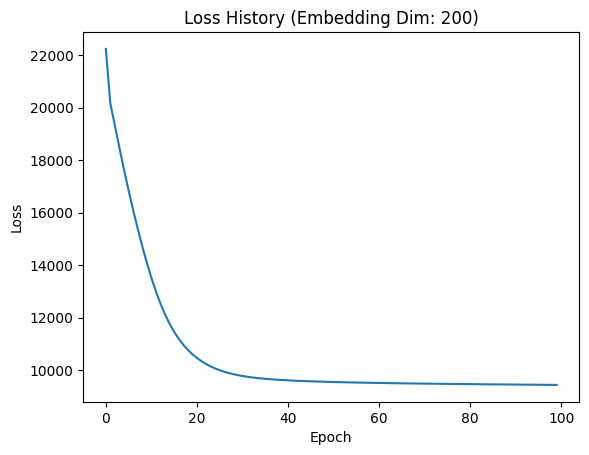

Cluster 9: ., a, about, address, after, afternoon, again, all, already, alright, am, an, and, another, any, anything, anyway, ask, fingers, finish, finished, follow, for, forever, four
Cluster 3: are, asleep, need, needed, net, never, next, nice, no, not, now, number, of, off, oh, ok, okay, on, once, one, online
Cluster 4: asked, asking, at, awake, away, babe, baby, back, bad, be, because, been, being, believe, flush, forward, free, friend, front, hey, his, holiday, home, honey, hope, hot, house, how, reason, replying, right, ring, robbed, rule, said, same, say, see, seen, send, sent, seriously, sexy, she, well, what, whenever
Cluster 6: best, better, between, big, birthday, bit, bits, bored, boy, break, bus, business, busy, but, buy, bye, call, called, can, cant, card, case, chases, chatting, choose, christmas, cold, come, coming, confused, cool, copy, could, course, crash, crossed, dad, darling, did, had, happy, has, have, he, heart, holidays, ship, shopping
Cluster 5: day, do, doing

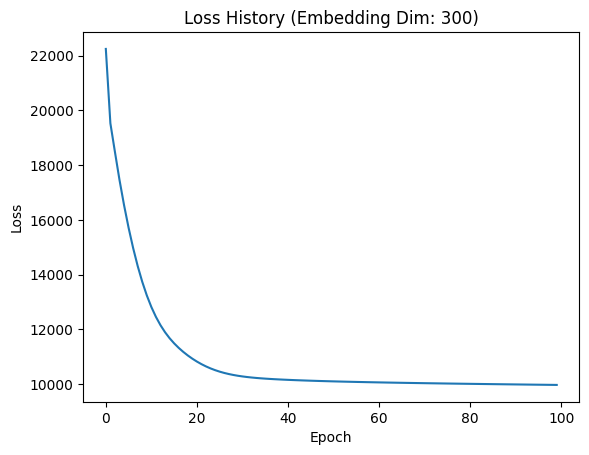

Cluster 4: ., a, about, address, after, afternoon, again, all, already, alright, am, an, and, another, any, anything, anyway, are, ask, follow, forever, forward, four, free, friend, from, front, fun, game, get, getting, girl, give, glad, gloves, god, little, looking, on, put, sleeping, someone, will
Cluster 5: asked, asking, at, being, darling, done, goes, grandmother, had, have, he, heart, help, him, how, its, loves, mate, me, talking, tell, text, texts, than, thanks, that, the, them, then, there, therefore, they, thing, things, think, thinking, well, whenever, whether, wont, work, working, worry, would, yet, you
Cluster 1: asleep, away, babe, baby, because, been, cant, crash, doing, dont, dream, go, hot, hour, house, hurt, if, long, lot, once, reason, replying, right, ring, robbed, rule, said, same, say, see, seen, send, sent, seriously, sexy, she, ship, shopping, should, since, sister, sitting
Cluster 3: awake, bad, card, case, chases, chatting, choose, christmas, cold, come, coming

In [47]:
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import defaultdict

# One-hot encoding dictionary from the previous step
# one_hot_dict = {...}  # Assuming it's already generated as per your corpus

# Hyperparameters
window_size = 5
learning_rate = 0.01
epochs = 100
vocab_size = len(one_hot_dict)

# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

# Loss function: Cross-entropy
def cross_entropy(pred, target):
    return -np.sum(target * np.log(pred + 1e-9))

# Gradient descent update
def gradient_descent(W1, W2, x, y_true, h, y_pred):
    # Compute gradients
    error = y_pred - y_true
    dW2 = np.outer(h, error)
    dW1 = np.outer(x, np.dot(W2, error))

    # Update weights
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    return W1, W2

# Skip-gram model training
def train_skipgram(one_hot_dict, W1, W2):
    words = list(one_hot_dict.keys())
    loss_history = []

    for epoch in range(epochs):
        total_loss = 0
        for word in words:
            # Get the one-hot vector for the current word (target word)
            x = np.array(one_hot_dict[word])
            
            # Get context words (within the window size)
            word_idx = words.index(word)
            context_indices = list(range(max(0, word_idx - window_size), min(len(words), word_idx + window_size + 1)))
            context_indices.remove(word_idx)  # Remove target word from context
            
            for context_idx in context_indices:
                context_word = words[context_idx]
                y_true = np.array(one_hot_dict[context_word])  # True label (one-hot vector)
                
                # Forward pass: Input -> Hidden
                h = np.dot(W1.T, x)
                
                # Hidden -> Output
                y_pred = softmax(np.dot(W2.T, h))
                
                # Compute loss
                loss = cross_entropy(y_pred, y_true)
                total_loss += loss
                
                # Backward pass (Gradient Descent)
                W1, W2 = gradient_descent(W1, W2, x, y_true, h, y_pred)
        
        loss_history.append(total_loss)
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {total_loss}')
    
    return W1, loss_history

# Automate training for different embedding dimensions
embedding_dims = [10, 50, 100, 200, 300]
all_loss_histories = {}  # To store loss histories for each embedding dimension

for embedding_dim in embedding_dims:
    print(f"Training with embedding dimension: {embedding_dim}")

    # Initialize weight matrices for each embedding dimension
    W1 = np.random.rand(vocab_size, embedding_dim)  # Input to hidden weights
    W2 = np.random.rand(embedding_dim, vocab_size)  # Hidden to output weights
    
    # Train the skip-gram model
    W1, loss_history = train_skipgram(one_hot_dict, W1, W2)
    all_loss_histories[embedding_dim] = loss_history

    # Plot loss history for the current embedding dimension
    plt.figure()
    plt.plot(loss_history)
    plt.title(f"Loss History (Embedding Dim: {embedding_dim})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # Perform clustering on word embeddings
    def word_clustering(W1, one_hot_dict, num_clusters=10):
        word_embeddings = W1  # Each row corresponds to a word's embedding
        kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(word_embeddings)
        
        # Create a dictionary to map words to their clusters
        word_clusters = defaultdict(list)
        for word, idx in one_hot_dict.items():
            cluster_label = kmeans.predict([W1[idx.index(1)]])[0]
            word_clusters[cluster_label].append(word)
        
        return word_clusters

    # Perform clustering on word embeddings
    word_clusters = word_clustering(W1, one_hot_dict, num_clusters=10)

    # Print cluster contents
    for cluster, words in word_clusters.items():
        print(f"Cluster {cluster}: {', '.join(words)}")


In [46]:
# Word clustering using the learned representations (W1)
def word_clustering(W1, one_hot_dict, num_clusters=20):
    word_embeddings = W1  # Each row corresponds to a word's embedding
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(word_embeddings)
    
    # Create a dictionary to map words to their clusters
    word_clusters = defaultdict(list)
    for word, idx in one_hot_dict.items():
        cluster_label = kmeans.predict([W1[idx.index(1)]])[0]
        word_clusters[cluster_label].append(word)
    
    return word_clusters

# Perform clustering on word embeddings
word_clusters = word_clustering(W1, one_hot_dict, num_clusters=50)

# Print cluster contents
for cluster, words in word_clusters.items():
    print(f"Cluster {cluster}: {', '.join(words)}")


Cluster 41: ., a, about, address, after, afternoon, again, all
Cluster 15: already, alright, am, an, and, another, any, anything, anyway
Cluster 3: are, ask, asked, asking, asleep, at, awake, away, babe, baby, back, bad
Cluster 13: be, because, been, being, believe, best, better, between, big, birthday
Cluster 49: bit, bits, bored, boy, break, bus, business
Cluster 12: busy, but, buy, bye, call, called
Cluster 31: can, cant, card, case, chases, chatting, choose, christmas
Cluster 10: cold, come, coming, confused, cool, copy, could
Cluster 47: course, crash, crossed, dad, darling, day
Cluster 35: did, do, doing, done, dont, down
Cluster 37: dream, either, else, even, ever
Cluster 6: everything, exercise, fact, feel, feeling, few, finally, fine, fingers, finish, finished
Cluster 21: flush, follow, for, forever, forward, four, free, friend
Cluster 40: from, front, fun, game, get
Cluster 16: getting, girl, give, glad, gloves, go, god, goes, going
Cluster 8: good, got, grandmother, had, han